In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [2]:
#The universe of variable and membership functions
velocity = ctrl.Antecedent(np.arange(0, 85.5, 0.5), 'velocity')
distance = ctrl.Antecedent(np.arange(0, 90.5, 0.5), 'distance')
brake = ctrl.Consequent(np.arange(0, 360.5, 0.5), 'brake')

C:\Users\asus\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\asus\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\asus\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


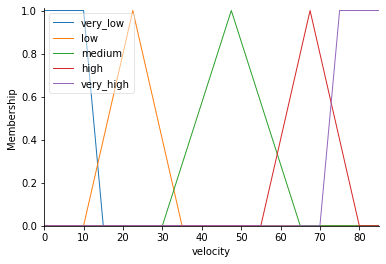

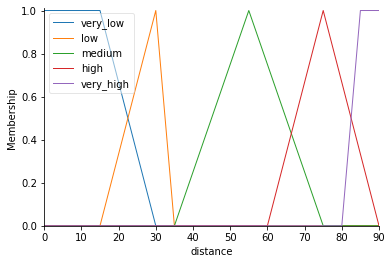

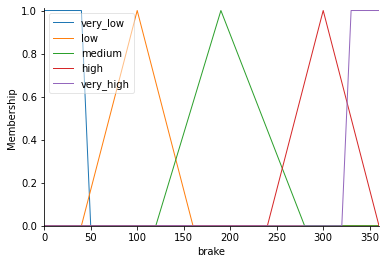

In [3]:
#Rules

velocity['very_low'] = fuzz.trapmf(velocity.universe, [0,0,10,15])
velocity['low'] = fuzz.trimf(velocity.universe, [10,22.5,35])
velocity['medium'] = fuzz.trimf(velocity.universe, [30,47.5,65])
velocity['high'] = fuzz.trimf(velocity.universe, [55,67.5,80])
velocity['very_high'] = fuzz.trapmf(velocity.universe, [70,75,85,85])

distance['very_low'] = fuzz.trapmf(distance.universe, [0,0,15,30])
distance['low'] = fuzz.trimf(distance.universe, [15,30,35])
distance['medium'] = fuzz.trimf(distance.universe, [35,55,75])
distance['high'] = fuzz.trimf(distance.universe, [60,75,90])
distance['very_high'] = fuzz.trapmf(distance.universe, [80,85,90,90])

brake['very_low'] = fuzz.trapmf(brake.universe, [0,0,40,50])
brake['low'] = fuzz.trimf(brake.universe, [40,100,160])
brake['medium'] = fuzz.trimf(brake.universe, [120,190,280])
brake['high'] = fuzz.trimf(brake.universe, [240,300,360])
brake['very_high'] = fuzz.trapmf(brake.universe, [320,330,360,360])

velocity.view()
distance.view()
brake.view()

In [4]:
rule1 = ctrl.Rule(velocity['very_low'] & distance['very_low'], brake['medium'])
rule2 = ctrl.Rule(velocity['very_low'] & distance['low'], brake['low'])
rule3 = ctrl.Rule(velocity['very_low'] & distance['medium'], brake['low'])
rule4 = ctrl.Rule(velocity['very_low'] & distance['high'], brake['very_low'])
rule5 = ctrl.Rule(velocity['very_low'] & distance['very_high'], brake['very_low'])

rule6 = ctrl.Rule(velocity['low'] & distance['very_low'], brake['high'])
rule7 = ctrl.Rule(velocity['low'] & distance['low'], brake['medium'])
rule8 = ctrl.Rule(velocity['low'] & distance['medium'], brake['low'])
rule9 = ctrl.Rule(velocity['low'] & distance['high'], brake['very_low'])
rule10 = ctrl.Rule(velocity['low'] & distance['very_high'], brake['very_low'])

rule11 = ctrl.Rule(velocity['medium'] & distance['very_low'], brake['very_high'])
rule12 = ctrl.Rule(velocity['medium'] & distance['low'], brake['high'])
rule13 = ctrl.Rule(velocity['medium'] & distance['medium'], brake['medium'])
rule14 = ctrl.Rule(velocity['medium'] & distance['high'], brake['low'])
rule15 = ctrl.Rule(velocity['medium'] & distance['very_high'], brake['very_low'])

rule16 = ctrl.Rule(velocity['high'] & distance['very_low'], brake['very_high'])
rule17 = ctrl.Rule(velocity['high'] & distance['low'], brake['high'])
rule18 = ctrl.Rule(velocity['high'] & distance['medium'], brake['high'])
rule19 = ctrl.Rule(velocity['high'] & distance['high'], brake['medium'])
rule20 = ctrl.Rule(velocity['high'] & distance['very_high'], brake['low'])

rule21 = ctrl.Rule(velocity['very_high'] & distance['very_low'], brake['very_high'])
rule22 = ctrl.Rule(velocity['very_high'] & distance['low'], brake['very_high'])
rule23 = ctrl.Rule(velocity['very_high'] & distance['medium'], brake['high'])
rule24 = ctrl.Rule(velocity['very_high'] & distance['high'], brake['medium'])
rule25 = ctrl.Rule(velocity['very_high'] & distance['very_high'], brake['low'])

140.2588344466774


C:\Users\asus\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


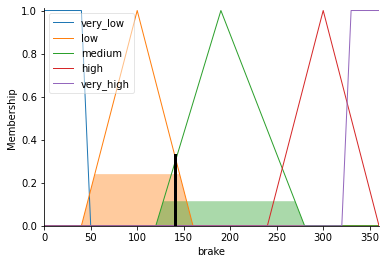

In [5]:
brake_ctrl = ctrl.ControlSystem(
    [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12,
    rule13, rule14, rule15,rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])

braking = ctrl.ControlSystemSimulation(brake_ctrl)

braking.input['velocity'] = 32
braking.input['distance'] = 56
                   
braking.compute()

print(braking.output['brake'])

brake.view(sim=braking)

plt.show()